In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py as h
import pandas as pd
import seaborn as sns

In [2]:
bank_org = h.File('../../../bankverification/bank_org.hdf','r')

print ('Number of templates in the bank:', len(bank_org['mass1']))

Number of templates in the bank: 439


# Results 

- The results are for 500 and 20000 injections
- The output file has mass and spin parameters for the injections 


In [3]:
matchout1 = 'match_results_20250218_185318.csv'
matchout2 = 'match_results_injections_20000.csv'

df_match1 = pd.read_csv(matchout1)
df_match2 = pd.read_csv(matchout2)

In [4]:
print (min(df_match1['match']),max(df_match1['match']))
 
print (min(df_match2['match']),max(df_match2['match']))

0.9787969986781352 0.9999999999965308
0.9481142094986654 0.999999999998092


/Users/kanchansoni/anaconda3/envs/modebymode/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kanchansoni/anaconda3/envs/modebymode/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


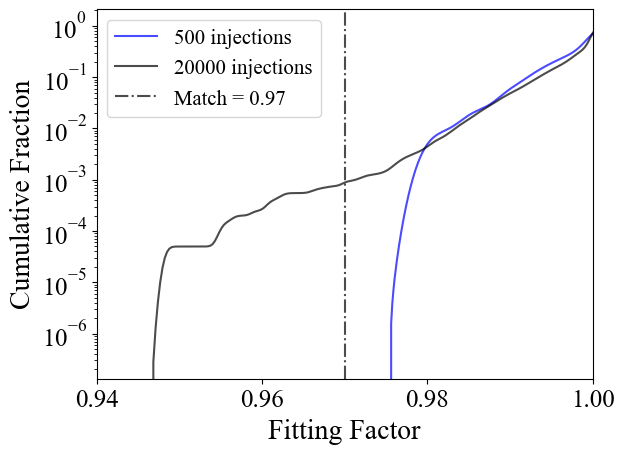

In [5]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.tick_params(axis='both', which='major', labelsize=18)

sns.kdeplot(df_match1['match'], cumulative=True,label='500 injections',color= 'blue',alpha=0.7)
sns.kdeplot(df_match2['match'], cumulative=True,label='20000 injections',color= 'black',alpha=0.7)

plt.yscale('log')
plt.xlabel('Fitting Factor',fontsize=20)
plt.ylabel('Cumulative Fraction',fontsize=20)
plt.xlim([0.94,1])
plt.axvline(x=0.97, color='black', linestyle='-.', linewidth=1.5, label='Match = 0.97',alpha=0.7)
plt.legend(fontsize=15)
plt.savefig('cumulative_fraction_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
pos_match2 = df_match2['match'][:] <= 0.98 
print ('Number of matches <= 0.98:', len(df_match2['match'][pos_match2]))

Number of matches <= 0.98: 89


In [7]:
injection_20000 = h.File('injections_20000.hdf','r')

In [8]:
# Extract the values from df_match2['mass1'] where pos_match2 is True
mass1_values = df_match2['mass1'][pos_match2].values

# Check the positions of these values in injection_20000['mass1']
positions = [np.where(injection_20000['mass1'][:] == value)[0] for value in mass1_values]


In [9]:
 
injection_20000.keys()


<KeysViewHDF5 ['alpha', 'alpha2', 'coa_phase', 'comoving_volume', 'distance', 'inclination', 'mass1', 'mass2', 'mchirp', 'polarization', 'q', 'redshift', 'spin1_a', 'spin1_azimuthal', 'spin1x', 'spin1y', 'spin1z', 'spin2_a', 'spin2_azimuthal', 'spin2x', 'spin2y', 'spin2z', 'tc']>

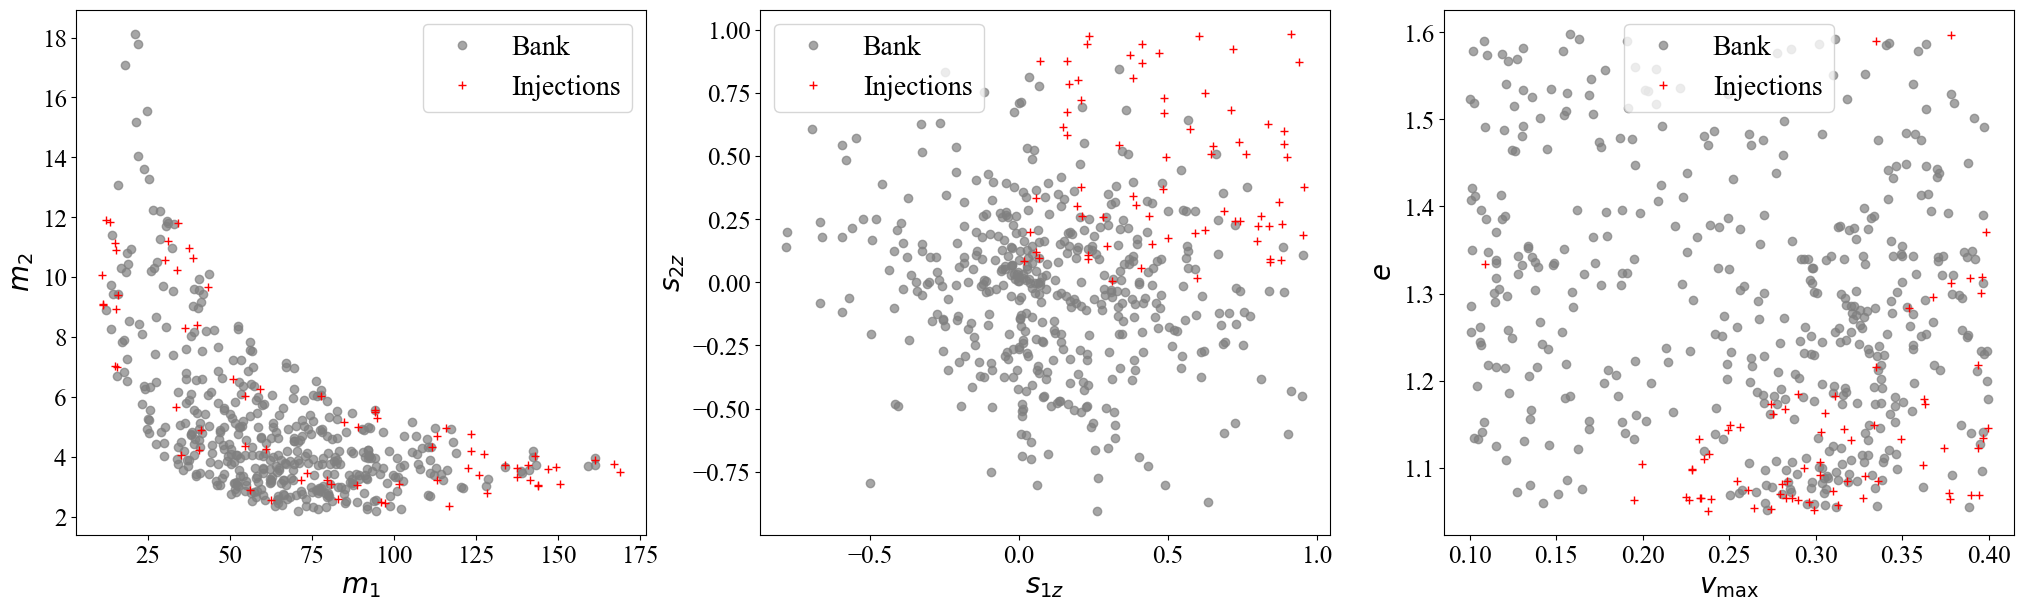

In [10]:
 
flattened_positions = np.concatenate(positions)

# Compare mass1, mass2, spin1z, spin2z, and total mass
mass1_bank = bank_org['mass1'][:]
mass2_bank = bank_org['mass2'][:]
spin1z_bank = bank_org['spin1z'][:]
spin2z_bank = bank_org['spin2z'][:]
velocity = bank_org['vmax'][:]
eccentricity = bank_org['eccentricity'][:]


total_mass_bank = mass1_bank + mass2_bank

mass1_injections = injection_20000['mass1'][flattened_positions]
mass2_injections = injection_20000['mass2'][flattened_positions]
spin1z_injections = injection_20000['spin1z'][flattened_positions]
spin2z_injections = injection_20000['spin2z'][flattened_positions]
velocity_injections = injection_20000['alpha'][flattened_positions]
ecc_injections = injection_20000['alpha2'][flattened_positions]

total_mass_injections = mass1_injections + mass2_injections

plt.figure(figsize=(25, 15))


plt.subplot(2, 3, 1)
plt.plot(mass1_bank, mass2_bank, 'o',label='Bank', alpha=0.7,color='grey')
plt.plot(mass1_injections, mass2_injections, '+', label='Injections',color='red')
plt.xlabel(r'$m_1$',fontsize=20)
plt.ylabel(r'$m_2$',fontsize=20)
plt.rcParams['font.family'] = 'Times New Roman'
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=20)

plt.subplot(2, 3, 2)
plt.plot(spin1z_bank, spin2z_bank, 'o',label='Bank', alpha=0.7,color='grey')
plt.plot(spin1z_injections, spin2z_injections, '+', label='Injections',color='red')
plt.xlabel(r'$s_{1z}$',fontsize=20)
plt.ylabel(r'$s_{2z}$',fontsize=20)
plt.rcParams['font.family'] = 'Times New Roman'
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=20)

plt.subplot(2, 3, 3)
plt.plot(velocity,eccentricity, 'o',label='Bank', alpha=0.7,color='grey')
plt.plot(velocity_injections,ecc_injections, '+', label='Injections',color='red')
plt.xlabel(r'$v_{\rm max}$',fontsize=20)
plt.ylabel(r'$e$',fontsize=20)

plt.rcParams['font.family'] = 'Times New Roman'
plt.tick_params(axis='both', which='major', labelsize=18)
plt.legend(fontsize=20)   

plt.show()

